### Fake News Classifier
Dataset:  https://www.kaggle.com/c/fake-news/data#

# Le but de ce projet est d'implémenter des modèles variés de classification de texte (fake ou real), de les comparer et de faire une critique du système de fake news.

## Data exploration

In [132]:
import pandas as pd

In [133]:
df=pd.read_csv('/content/train.csv')

In [134]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


Notre dataset est formé de 20800 lignes et 5 colonnes. Chaque ligne représente un article bien déterminé et les 5 colonnes sont représentatives des caractéristiques d'un article: title, author, text and label (fake '1' or real '0') 

In [135]:
df.shape

(20800, 5)

label
0    10387
1    10374
Name: text, dtype: int64


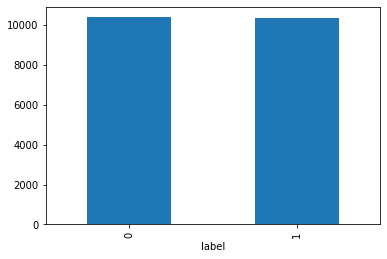

In [136]:
import matplotlib.pyplot as plt
print(df.groupby(['label'])['text'].count())
df.groupby(['label'])['text'].count().plot(kind='bar')
plt.show()

Il s'agit d'un dataset équilibré. Mais cherchons s'il y a des cases vides.

In [137]:
df=df.dropna()

In [138]:
df.shape

(18285, 5)

label
0    10361
1     7924
Name: text, dtype: int64


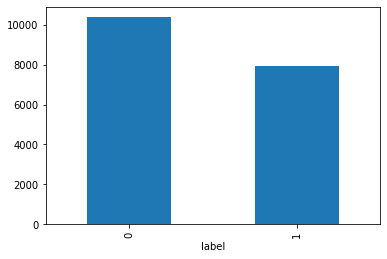

In [139]:
import matplotlib.pyplot as plt
print(df.groupby(['label'])['text'].count())
df.groupby(['label'])['text'].count().plot(kind='bar')
plt.show()

En supprimant les lignes qui contiennent des cases vides, les articles réels deviennent quantitativement supérieurs.

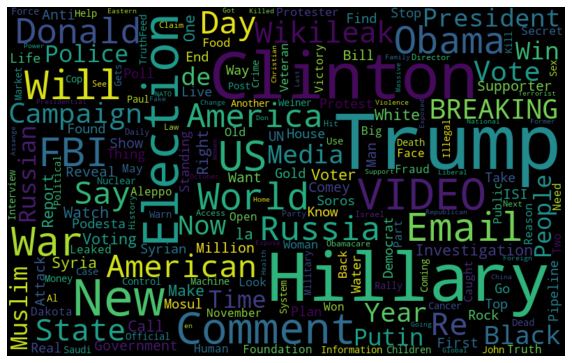

In [140]:
from wordcloud import WordCloud
fake_data = df[df['label'] == 1]
all_words = ' '.join([text for text in fake_data.title])
wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

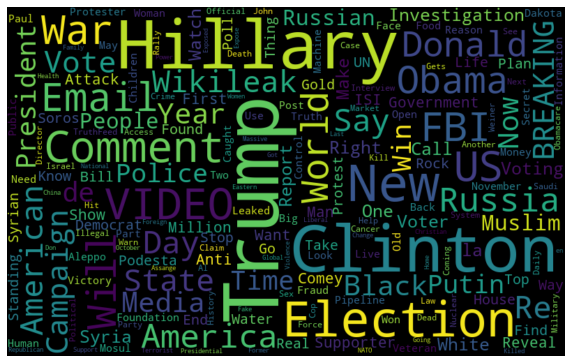

In [141]:
real_data = df[df['label'] == 0]
all_words = ' '.join([text for text in fake_data.title])
wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

En observant les deux figures précédentes, on peut déduire que les mots qui dominent dans les titres des articles sont d'ordre politique.

In [142]:
messages=df.copy()

In [143]:
messages.reset_index(inplace=True)

In [144]:
messages['title'][6]

'Benoît Hamon Wins French Socialist Party’s Presidential Nomination - The New York Times'

On va utiliser une copie de notre dataframe pour extraire les features.

## Feature extraction

Tout d'abord, on normalise les données textuelles pour extraire l'information la plus importante. Pour ce faire, on suit les étapes suivante:


1.   extraire seulement le texte mot par mot et ignorer les caractères non alphabétiques
2.   transformer les lettres majuscules en lettres miniscules.
3.   garder seulement les racines. 
Exemple: si on a les trois mots suivants: "write", "written", "wrote" on garde seulement "write".



> Indented block



In [145]:
import nltk
nltk.download('stopwords')
import regex as re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [146]:
corpus[3]

'civilian kill singl us airstrik identifi'

Une fois les données sont normalisées, on peut extraire les features.
On fixe un nombre maximal de features égal à 5000.


In [147]:
## Applying Countvectorizer
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [148]:
X.shape

(18285, 5000)

In [149]:
y=messages['label']

Maintenant, on a:


*   la matrice des features indépendants X
*   target y

Donc, on peut commencer le processus classique du training des données. Tout d'abord, on répartit les données en données de training et données de test.





In [150]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Les features sont classés par ordre alphabétique dans les colonnes de la matrice X

In [151]:
cv.get_feature_names()[:20]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest']

Voici les paramètres sur lesquels on peut jouer pour extraire les features

In [152]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [153]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())

Donc, on visualise les données utilisées pour le training. En effet, la case (i,j) ième ligne, jème colonne contient le nombre d'occurence du feature j dans l'article i. C'est aussi simple que ça !

In [154]:
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,abstain,absurd,abus,abus new,abus new york,academi,accept,access,access pipelin,access pipelin protest,accid,accident,accord,account,accus,accus trump,achiev,acknowledg,acknowledg emf,acknowledg emf damag,aclu,acquit,acquitt,acr,across,act,act like,act new,act new york,action,...,yahoo,yale,ye,year,year ago,year breitbart,year eve,year later,year new,year new york,year old,year old girl,year sinc,yemen,yet,yet anoth,yiannopoulo,yield,yo,york,york citi,york new,york new york,york state,york time,yorker,young,youth,youtub,zealand,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [155]:
import matplotlib.pyplot as plt

On va utiliser la fonction suivante pour l'affichage de la matrice de confusion.

In [156]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

On démarre maintenant le processus d'apprentissage. Puis, on teste le modèle sur les données de test et on analyse les résultats pour chaque modèle. 


### MultinomialNB Algorithm

Multinomial Naive Bayes est un algorithme d'apprentissage convenable pour des features discrets. 

In [157]:
#The multinomial Naive Bayes classifier is suitable for classification with discrete features
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [158]:
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.900
Confusion matrix, without normalization


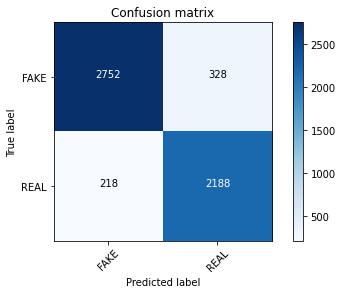

In [159]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [160]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy=    "+str(score)+'\n')
from sklearn.metrics import f1_score
f1=f1_score(y_test, pred, average='weighted')
print("f1_score=    "+str(f1))

accuracy=    0.9004739336492891

f1_score=    0.9006812872801924


In [161]:
y_train.shape

(12799,)

### Multinomial Classifier with Hyperparameter

Ici, on va paramétrer le multinomial classifieur et faire une itération pour choisir enfin le classifieur avec l'accuracy maximale.

In [162]:
classifier=MultinomialNB(alpha=0.1)

In [163]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Score : 0.8875318993802406
Alpha: 0.1, Score : 0.8986511119212541
Alpha: 0.2, Score : 0.9006562158220927
Alpha: 0.30000000000000004, Score : 0.9001093693036821
Alpha: 0.4, Score : 0.8995625227852716
Alpha: 0.5, Score : 0.9002916514764856
Alpha: 0.6000000000000001, Score : 0.9010207801676996
Alpha: 0.7000000000000001, Score : 0.9001093693036821
Alpha: 0.8, Score : 0.9001093693036821
Alpha: 0.9, Score : 0.9002916514764856


In [164]:
## Get Features names
feature_names = cv.get_feature_names()

In [165]:
classifier.coef_[0]

array([ -8.79486884,  -8.79486884,  -9.66167952, ..., -10.83175077,
        -8.79486884,  -9.66167952])

On observe les features (mots) les plus importants (qui ont plus de poids) dans les titres des articles réels, classés par ordre décroissant.

In [166]:
### Most real
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

[(-3.9614666262140155, 'trump'),
 (-4.282417994539153, 'hillari'),
 (-4.3652605050036515, 'clinton'),
 (-4.900685177475604, 'elect'),
 (-5.147037859810586, 'new'),
 (-5.213364817047466, 'video'),
 (-5.262982269674981, 'comment'),
 (-5.324163426150062, 'us'),
 (-5.4087605785082005, 'war'),
 (-5.4087605785082005, 'fbi'),
 (-5.433588070228684, 'hillari clinton'),
 (-5.474640525356908, 'email'),
 (-5.522933170564533, 'vote'),
 (-5.5853116659670645, 'obama'),
 (-5.670781596349623, 'world'),
 (-5.723115316398647, 'donald'),
 (-5.750346406761974, 'russia'),
 (-5.750346406761974, 'donald trump'),
 (-5.7712676719226135, 'america'),
 (-5.8829908813682685, 'day')]

Presque ce sont les mêmes mots qui ont le plus de valeur dans les fake articles aussi. 

In [167]:
### Most fake
sorted(zip(classifier.coef_[0], feature_names),reverse=True)[:5000]

[(-3.9614666262140155, 'trump'),
 (-4.282417994539153, 'hillari'),
 (-4.3652605050036515, 'clinton'),
 (-4.900685177475604, 'elect'),
 (-5.147037859810586, 'new'),
 (-5.213364817047466, 'video'),
 (-5.262982269674981, 'comment'),
 (-5.324163426150062, 'us'),
 (-5.4087605785082005, 'war'),
 (-5.4087605785082005, 'fbi'),
 (-5.433588070228684, 'hillari clinton'),
 (-5.474640525356908, 'email'),
 (-5.522933170564533, 'vote'),
 (-5.5853116659670645, 'obama'),
 (-5.670781596349623, 'world'),
 (-5.723115316398647, 'donald'),
 (-5.750346406761974, 'russia'),
 (-5.750346406761974, 'donald trump'),
 (-5.7712676719226135, 'america'),
 (-5.8829908813682685, 'day'),
 (-5.8988768389570785, 'say'),
 (-5.906915467453514, 'presid'),
 (-5.915019239516621, 'break'),
 (-5.9481074523918736, 'wikileak'),
 (-5.956553448545285, 'campaign'),
 (-5.956553448545285, 'american'),
 (-5.965071387610587, 'state'),
 (-6.054496438057611, 'support'),
 (-6.073382740686359, 'call'),
 (-6.132281017459944, 'year'),
 (-6.132

## Passive agressive classifier

Ce modèle est très utilisé pour la détection de fake news.

In [168]:
#this model is used for Big data
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(max_iter=50)

accuracy:   0.913 

f1_score=    0.9134372602030593

Confusion matrix, without normalization


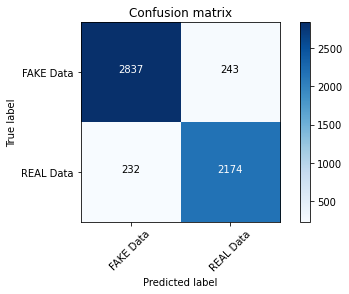

In [169]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f \n" % score)
f1=f1_score(y_test, pred, average='weighted')
print("f1_score=    "+str(f1)+'\n')
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

## Logistic regression

In [170]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(random_state=0,max_iter=10000).fit(X_train, y_train)
y_pred=clf.predict(X_test)
f1=f1_score(y_test, y_pred, average='weighted')
score = metrics.accuracy_score(y_test, y_pred)
print("accuracy=    "+str(score)+'\n')
print("f1_score=    "+ str(f1))

accuracy=    0.932191031717098

f1_score=    0.9323985189848165


Confusion matrix, without normalization


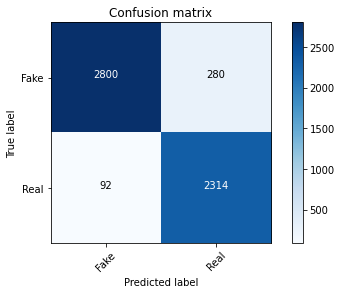

In [171]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

## Decision tree

In [172]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
y_pred=dt.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print("accuracy=      "+str(score))
f1=f1_score(y_test, y_pred, average='weighted')
print("f1_score=      "+str(f1))

accuracy=      0.9161502005103901
f1_score=      0.9162812657771927


Confusion matrix, without normalization


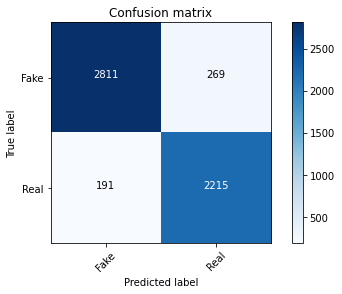

In [173]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

On remarque que les différents modèles de classification donnent des résultats comparables à propos la précision et le f1_score avec une légère supériorité pour la régression logistique.

**Critique:**
C'est vrai qu'on peut prédire la nature des news (fake or real) avec une bonne précision grâce à la technique de NLP et des méthodes classiques de Machine learning. Mais cela n'empêche qu'il y a des points importants à considérer au niveau de l'extraction des features. En effet, l'extraction des features considère les propriétés linguistiques du texte (occurence des mots utilisés et leur répartition). Donc, il se peut qu'un texte réel est classé "fake" seulement parce que la répartition de ses mots est proche de la répartition des mots d'un article "fake". En plus, il y a des auteurs amateurs (sur les réseaux sociaux par exemple) qui n'utilisent pas un style professionnel d'écriture. Donc, c'est injuste que l'algorithme classe leurs articles en "fake" parce que leur style diffère d'un style professionnel. Par suite, ceci peut toucher à la motivation des écrivains.








# BEN BRAHIM Sami
## 3A MINDS 